# 1. Data Loading and Inspection

In [1]:
import pandas as pd

file_path = "world_happiness_report.csv"  # Replace with the actual file path
data = pd.read_csv("2019.csv")

# Display the first few rows and dataset info
print("Dataset Head:")
print(data.head())
print("\nData Info:")
print(data.info())


Dataset Head:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2  

# 2. Data Cleaning


In [2]:
# Fill missing numeric values with the column mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


# 3. EDA


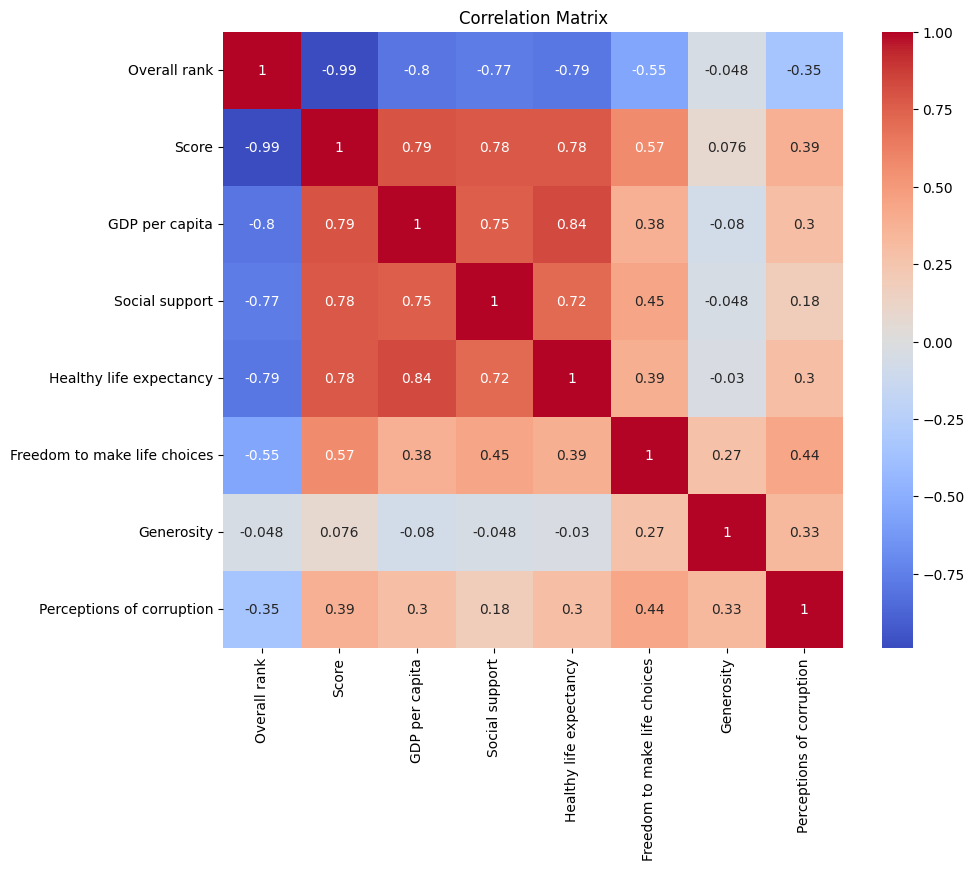

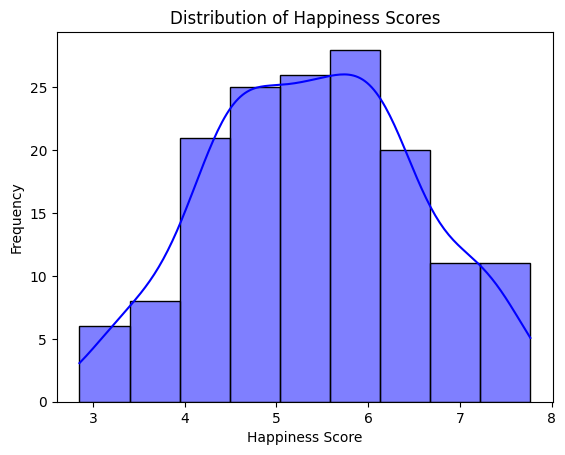

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of happiness scores
sns.histplot(data['Score'], kde=True, color='blue')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()


# 4. Regional Analysis


In [4]:
# Bar plot of average happiness score by region
if 'Region' in data.columns:
	region_data = data.groupby('Region')['Happiness Score'].mean().sort_values()
	region_data.plot(kind='bar', figsize=(10, 6), color='green')
	plt.title("Average Happiness Score by Region")
	plt.xlabel("Region")
	plt.ylabel("Happiness Score")
	plt.show()
else:
	print("'Region' column not found in dataset.")


'Region' column not found in dataset.


# 5. Time Series Analysis


In [5]:
# Check if 'Year' column exists
if 'Year' in data.columns:
	time_series_data = data.groupby(['Year', 'Country'])['Happiness Score'].mean().unstack()
	time_series_data.T.plot(figsize=(15, 8))
	plt.title("Happiness Scores Over Time by Country")
	plt.xlabel("Year")
	plt.ylabel("Happiness Score")
	plt.show()
else:
	print("'Year' column not found in dataset.")


'Year' column not found in dataset.


# 6. Regression Modeling


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select features and target variable
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
target = 'Score'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and evaluate the regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Feature Importance: {dict(zip(features, model.coef_))}")


R2 Score: 0.5831750841034313
Feature Importance: {'GDP per capita': np.float64(0.7903963438449658), 'Social support': np.float64(1.2055917395967608), 'Healthy life expectancy': np.float64(1.1072774160760375), 'Freedom to make life choices': np.float64(1.3635929327261962), 'Generosity': np.float64(0.4110281477335305), 'Perceptions of corruption': np.float64(1.253954536118961)}


# Save cleaned data and results (optional)


In [7]:
cleaned_file_path = "cleaned_happiness_data.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to cleaned_happiness_data.csv
